# Import library and Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')

# Preprocess Data

In [2]:
# Example using One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [3]:
print(df.isnull().sum())

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


# Features and Target

In [4]:
X = df.drop('charges', axis=1)  # features
y = df['charges']               # target variable


# Train Test_split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


# Evaluate Model

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4181.19
RMSE: 5796.28


# Visualize How BMI, Age, and Smoking Affect Charges

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
test_data = X_test.copy()
test_data['charges_actual'] = y_test
test_data['charges_predicted'] = y_pred

plt.figure(figsize=(16, 4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

# BMI vs Charges

Text(0.5, 1.0, 'BMI vs Charges')

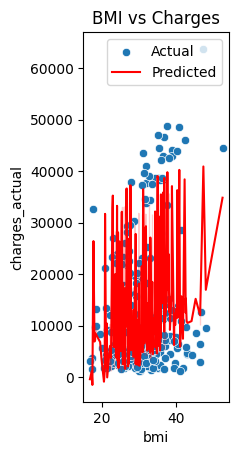

In [11]:
plt.subplot(1, 3, 1)
sns.scatterplot(x=test_data['bmi'], y=test_data['charges_actual'], label='Actual')
sns.lineplot(x=test_data['bmi'], y=test_data['charges_predicted'], color='red', label='Predicted')
plt.title('BMI vs Charges')

# Age vs Charges

Text(0.5, 1.0, 'Age vs Charges')

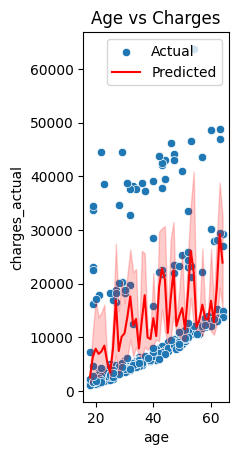

In [12]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=test_data['age'], y=test_data['charges_actual'], label='Actual')
sns.lineplot(x=test_data['age'], y=test_data['charges_predicted'], color='red', label='Predicted')
plt.title('Age vs Charges')

# Smoking Status vs Charges

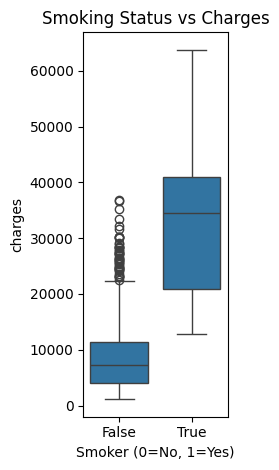

In [13]:
plt.subplot(1, 3, 3)
# For smoking, since encoded as binary column 'smoker_yes' (assuming OneHotEncoding)
sns.boxplot(x=df['smoker_yes'], y=df['charges'])
plt.title('Smoking Status vs Charges')
plt.xlabel('Smoker (0=No, 1=Yes)')

plt.tight_layout()
plt.show()